<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="80px"border="1px"></p>
    
</div>
<h1>Nano Desafio 6 </h1>
<h2>Pandas - estatísticas </h2>

Aluno:

Data:

##### Introdução

Já conhecemos o pandas e um pouco do seu poder para analisar dados! Agora vamos fazer alguns calculos estatísticos usando essa ferramenta já no ritmo de despedida e também como uma  prévia do que esta por vir. Afinal você está crescendo e sua jornada de Introdução ao Python está chegando ao fim!!!

A Estatística já está batendo a porta e dando boas vindas!!

##### Estatísticas
Estatísticas resumo, para que servem? Adivinhe? - elas "resumem" muitos números!!!. Por exemplo, média, mediana, mínimo, máximo e desvio padrão são estatísticas resumidas. O cálculo de estatísticas resumidas permitem que você tenha uma noção melhor de seus dados, mesmo que você tenha milhares ou milhões!!

##### O conjunto de dados
A Walt Disney Studios já produziu mais de 600 filmes desde seu filme de estreia, Branca de Neve e os Sete Anões, em 1937. Vamos, explorar um conjunto de dados de filmes da Disney !! Esses dados foram compilados por <a href="https://data.world/kgarrett/disney-character-success-00-16">Kelly Garrett</a>. Os dados contêm 579 filmes da Disney com seis características: título do filme, data de lançamento, gênero, classificação MPAA, bilheteria bruta  e bilheteria ajustada pela inflação. </p>

1 -Importe o  [dataset disney_movies_total_gross.csv](https://drive.google.com/file/d/1WtNcv-0XV5j954UNDkf2GW60vZHpqpzl/view?usp=sharing) e salvar com o nome dados.

In [8]:
import pandas as pd
# Leia o arquivo
dados = pd.read_csv('disney_movies_total_gross.csv', parse_dates =['release_date'])

In [13]:
# Convertendo valores de Currency para type float com regex tirando $
dados["total_gross"] = dados["total_gross"].replace("[$,]", "", regex=True).astype(float)
dados["inflation_adjusted_gross"] = dados["inflation_adjusted_gross"].replace("[$,]", "", regex=True).astype(float)

2 -  Imprima as primeiras linhas desse dataset

In [12]:
dados.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08


Obs.: Motion Picture Association of America (MPAA) - é uma associação que tem por objetivo original garantir a viabilidade da indústria cinematográfica norte-americana. Além disso, a MPA estabeleceu diretrizes para o conteúdo de filmes que resultaram na criação do Código de Produção em 1930.
Por exemplo, a classificação de filmes segundo essa associação é:

![wikipedia](mpaa_rating.png)

fonte:https://pt.wikipedia.org/wiki/Motion_Picture_Association

Agora, antes de mais nada vamos renomear as colunas para ficar mais fácil o entendimento?

['tit_do_filme','dt_lancamento','genero','classificacao_mpaa','bilheteria_bruta','bilheteria_ajustada_inflacao']

3 - Veja o dataset agora:

In [14]:
dados.columns = ['tit_do_filme','dt_lancamento','genero','classificacao_mpaa','bilheteria_bruta','bilheteria_ajustada_inflacao']

In [15]:
dados

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979.0,1.254598e+07
575,Queen of Katwe,2016-09-23,Drama,PG,8874389.0,8.874389e+06
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923.0,2.325329e+08
577,Moana,2016-11-23,Adventure,PG,246082029.0,2.460820e+08


4 -Imprima informações básicas sobre o DataFrame

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tit_do_filme                  579 non-null    object        
 1   dt_lancamento                 579 non-null    datetime64[ns]
 2   genero                        562 non-null    object        
 3   classificacao_mpaa            523 non-null    object        
 4   bilheteria_bruta              579 non-null    float64       
 5   bilheteria_ajustada_inflacao  579 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 27.3+ KB


5 - Calcule a média da bilheteria ajustada

In [18]:
dados['bilheteria_ajustada_inflacao'].mean().round(2)

118762523.31

6 - Calcule a mediana da bilheterias ajustada

In [20]:
dados['bilheteria_ajustada_inflacao'].median()

55159783.0

7 - Encontre as datas máximas e minimas de lançamentos de filmes nesse dataset

In [21]:
print(dados['dt_lancamento'].max())
print(dados['dt_lancamento'].min())

2016-12-16 00:00:00
1937-12-21 00:00:00


8 - Qual filme tem maior bilheteria_ajustada_inflacao ?

In [22]:
dados[dados['bilheteria_ajustada_inflacao'] == dados['bilheteria_ajustada_inflacao'].max()]

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09


9 - Ordene os dados por dt_lancamento e chame de data_ordenada

In [23]:
data_ordenada = dados.sort_values('dt_lancamento', ascending=True)
data_ordenada

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979.0,1.254598e+07
575,Queen of Katwe,2016-09-23,Drama,PG,8874389.0,8.874389e+06
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923.0,2.325329e+08
577,Moana,2016-11-23,Adventure,PG,246082029.0,2.460820e+08


10- Obtenha a soma cumulativa da bilheteria_ajustada_inflacao,adicione ao dataset com o nome de bilheteria_milionaria

In [24]:
dados['bilheteria_milhonaria'] = dados['bilheteria_ajustada_inflacao'].cumsum()

11 - Veja a coluna que você criou

In [25]:
dados.head()

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao,bilheteria_milhonaria
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09,5.228953e+09
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09,7.417182e+09
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09,9.604273e+09
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09,1.068278e+10
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08,1.160339e+10


12 - Selecione os filmes de aventura e atribua a uma variável chamada filmes_aventura

In [26]:
filmes_aventura = dados[dados['genero']=='Adventure']

13 - Veja as primeiras linha desse novo dataset:

In [27]:
filmes_aventura.head()

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao,bilheteria_milhonaria
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09,7.417182e+09
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09,1.068278e+10
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000.0,5.282800e+08,1.213167e+10
12,The Sword in the Stone,1963-12-25,Adventure,NaN,22182353.0,1.538708e+08,1.545047e+10
21,The Rescuers,1977-06-22,Adventure,NaN,48775599.0,1.597439e+08,1.721542e+10


14 - Conte o número de filmes por genero e ordene

In [28]:
acumulativo_genero = dados['genero'].value_counts(sort=True)
acumulativo_genero

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genero, dtype: int64

15 - Calcule agora a proporção de filmes por genero e ordene

In [30]:
acumulativo_genero = dados['genero'].value_counts(normalize=True) * 100
acumulativo_genero

Comedy                 32.384342
Adventure              22.953737
Drama                  20.284698
Action                  7.117438
Thriller/Suspense       4.270463
Romantic Comedy         4.092527
Musical                 2.846975
Documentary             2.846975
Western                 1.245552
Horror                  1.067616
Black Comedy            0.533808
Concert/Performance     0.355872
Name: genero, dtype: float64

Estatísticas resumidas agrupadas

16 - Calcule o total da "bilheteria_bruta"

In [31]:
bilheteria_bruta = dados['bilheteria_bruta'].sum()
bilheteria_bruta

37462335553.0

17 - Visualize os tipos de generos que tem nesse dataset:

In [32]:
dados.genero.unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

18 - Calcule o total da bilheteria_bruta pelo genero 'Drama'

In [33]:
drama = dados[dados['genero']=='Drama']['bilheteria_bruta'].sum()
drama

4106972970.0

19 - Calcule o total da bilheteria_bruta pelo genero Comedia 'Comedy'

In [34]:
comedia = dados[dados['genero']=='Comedy']['bilheteria_bruta'].sum()
comedia

8119619678.0

20 - Calcule o total da bilheteria_bruta pelo genero Ação 'Action'

In [35]:
acao = dados[dados['genero']=='Action']['bilheteria_bruta'].sum()
acao

4184563282.0

21 -  Obtenha proporção do bilheteria_bruta para os três generos acima.

In [36]:
proporcao = [drama, comedia, acao] / bilheteria_bruta
proporcao

array([0.10962939, 0.21674088, 0.11170054])

22 - Importe numpy com o alias np

In [37]:
import numpy as np

23 - Para cada genero de filme, agregue a bilheteria_bruta obtendo min, max, média e mediana e imprima o resultado

Dica: use numpy para as estatísticas

In [38]:
estat_total_bilheteria_bruta = dados.groupby('genero')['bilheteria_bruta'].agg([np.min, np.max, np.mean, np.median])
estat_total_bilheteria_bruta

,amin,amax,mean,median
genero,,,,
Action,0.0,623279547.0,1.046141e+08,43315244.5
Adventure,2815.0,936662225.0,1.270471e+08,65000000.0
Black Comedy,17105219.0,52353636.0,3.251440e+07,28084357.0
Comedy,45779.0,244082982.0,4.461329e+07,26923500.5
Concert/Performance,38174685.0,65281781.0,5.172823e+07,51728233.0
Documentary,20521.0,32011576.0,1.129285e+07,9688331.0
Drama,0.0,201151353.0,3.602608e+07,19730097.0
Horror,4877567.0,26570463.0,1.451148e+07,13439137.5
Musical,5632086.0,218951625.0,7.233026e+07,53041787.5


24 - Para cada genero de filme, agregue bilheteria_bruta e bilheteria_ajustada_inflacao: obtenha o minimo, maximo, média e mediana

In [39]:
estat_total_bruto = dados.groupby('genero')[['bilheteria_bruta', 'bilheteria_ajustada_inflacao']].agg([np.min, np.max, np.mean, np.median])
estat_total_bruto

bilheteria_bruta                                         \
                                amin         amax          mean      median   
genero                                                                        
Action                           0.0  623279547.0  1.046141e+08  43315244.5   
Adventure                     2815.0  936662225.0  1.270471e+08  65000000.0   
Black Comedy              17105219.0   52353636.0  3.251440e+07  28084357.0   
Comedy                       45779.0  244082982.0  4.461329e+07  26923500.5   
Concert/Performance       38174685.0   65281781.0  5.172823e+07  51728233.0   
Documentary                  20521.0   32011576.0  1.129285e+07   9688331.0   
Drama                            0.0  201151353.0  3.602608e+07  19730097.0   
Horror                     4877567.0   26570463.0  1.451148e+07  13439137.5   
Musical                    5632086.0  218951625.0  7.233026e+07  53041787.5   
Romantic Comedy             468240.0  178406268.0  5.009595e+07  32680633.0   
Thriller/Suspense          2154540.0  293506292.0  5.861694e+07  28153827.0   
Western                    8247627.0   89302115.0  5.128735e+07  56932305.0   

                    bilheteria_ajustada_inflacao                              \
                                            amin          amax          mean   
genero                                                                         
Action                                       0.0  6.600812e+08  1.374734e+08   
Adventure                                 2984.0  2.188229e+09  1.903974e+08   
Black Comedy                          28392518.0  7.675819e+07  5.224349e+07   
Comedy                                   82277.0  1.362871e+09  8.466773e+07   
Concert/Performance                   38174685.0  7.664699e+07  5.741084e+07   
Documentary                              23064.0  3.598101e+07  1.271803e+07   
Drama                                        0.0  1.236036e+09  7.189302e+07   
Horror                                 9907922.0  4.854616e+07  2.341385e+07   
Musical                               11468231.0  5.228953e+09  6.035979e+08   
Romantic Comedy                         907414.0  3.563898e+08  7.777708e+07   
Thriller/Suspense                      3957025.0  4.854247e+08  8.965379e+07   
Western                               15983331.0  1.157817e+08  7.381571e+07   

                                  
                          median  
genero                            
Action                69012064.5  
Adventure            102254492.0  
Black Comedy          51579764.0  
Comedy                51195217.0  
Concert/Performance   57410839.0  
Documentary           12344483.5  
Drama                 39325794.0  
Horror                18589709.5  
Musical              103167587.5  
Romantic Comedy       57925202.0  
Thriller/Suspense     51804588.0  
Western               89042541.0

Está na hora de fazermos um pouco de gráficos. Não existe análise de dados sem visualização!!

In [40]:
import seaborn as sns
sns.set()

25 - Some a bilheteria_bruta por genero

In [41]:
soma_genero =dados.groupby('genero')['bilheteria_bruta'].sum()



26 - Agora sim faça um gráfico de barras com o resultado anterior!

Text(0.5, 1.0, 'Bilheteria Bruta por genero')

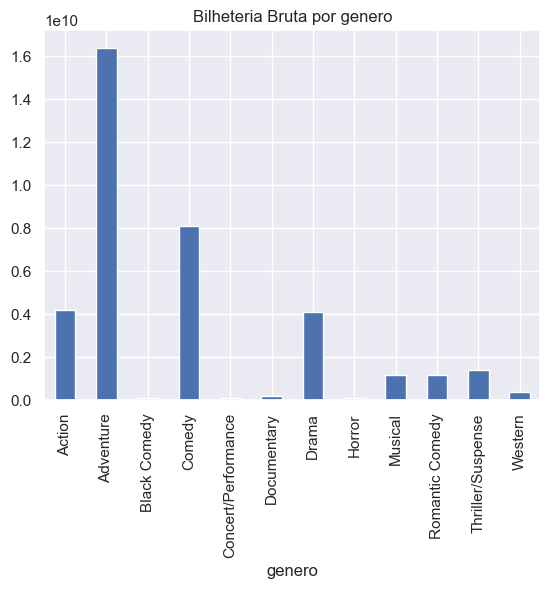

In [42]:


soma_genero.plot.bar().set_title('Bilheteria Bruta por genero')

27 - Importe o seaborn com o apelido sns

In [ ]:
import seaborn as sns
sns.set()

28 -Faça um boxplot comparando a bilheteria_ajustada_inflacao dos filmes de ação e comédia


In [43]:
acao_comedia = dados[dados.genero.isin(['Action','Comedy'])]
acao_comedia

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao,bilheteria_milhonaria
8,101 Dalmatians,1961-01-25,Comedy,G,153000000.0,1.362871e+09,1.475208e+10
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407.0,3.100946e+08,1.506218e+10
11,Bon Voyage!,1962-05-17,Comedy,Not Rated,9230769.0,1.095816e+08,1.529660e+10
14,Blackbeard's Ghost,1968-02-08,Comedy,NaN,21540050.0,1.386127e+08,1.637870e+10
16,The Boatniks,1970-07-01,Comedy,NaN,18607492.0,1.012007e+08,1.673506e+10
...,...,...,...,...,...,...,...
544,Captain America: The Winter Soldier,2014-04-04,Action,PG-13,259746958.0,2.680131e+08,6.219943e+10
551,"Alexander and the Terrible, Horrible,…",2014-10-10,Comedy,PG,66954149.0,6.905555e+07,6.303430e+10
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868.0,4.590059e+08,6.412794e+10
561,Ant-Man,2015-07-17,Action,PG-13,180202163.0,1.802022e+08,6.475804e+10


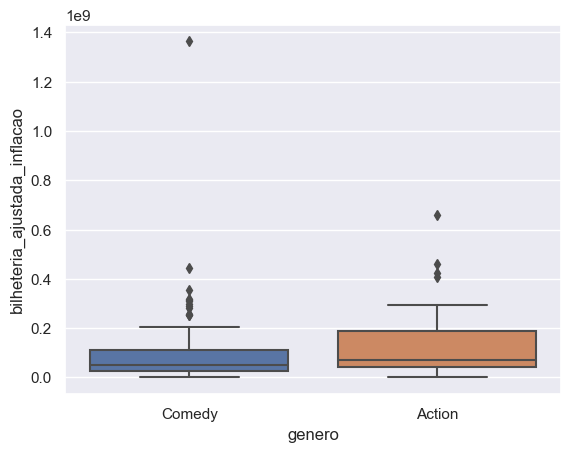

In [44]:
sns.boxplot(x="genero",
                y="bilheteria_ajustada_inflacao",
                data=acao_comedia);